In [6]:
from matplotlib import pyplot as plt
import numpy as np

## Método de Euler Mejorado o método de Heun o RK2

Corresponde a modificación del método de Euler y se consigue integrando la ecuación diferencial
$y'=f(x,y)$ entre $x_i$ y $x_{i+1}$:

$$  \int_{x_i}^{x_{i+1}} y'(x) dx = \int_{x_i}^{x_{i+1}} f(x,y(x)) dx $$

donde la integral de la izquierda se puede integrar directamente y la de la derecha aproximar mediante la regla del trapecio

$$ y(x_{i+1})-y(x_{i}) = \frac{h}{2} \left[ f(x_i , y(x_i)) + f(x_{i+1}, y(x_{i+1})) \right] $$

Despejando 

$$ y(x_{i+1}) = y(x_{i})+\frac{h}{2} \left[ f(x_i , y(x_i)) + f(x_{i+1}, y(x_{i+1})) \right] $$

es decir,

$$ y_{i+1} = y_i+\frac{h}{2} \left[ f(x_i , y_i) + f(x_{i+1}, y_i +h f(x_i,y_i)) \right] $$



## Algoritmo

Para el problema 
$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método de Euler está dado por:
    
Para $i=0,1, ... , n-1$ realizar <br>
*    $ x_i = x_0+ih $ <br>
*    $y_{i+1}^*= y_i +h f(x_i , y_i) $ <br>
*    $y_{i+1} = y_i + \dfrac{h}{2} \left[ f(x_i , y_i) + f(x_{i+1}, y_{i+1}^*) \right] $ <br>

Fin

## Ejercicio:

* a)  Elabore una función en Python que permita encontrar una aproximación de $y(x_n)$ utilizando el método de Euler mejorado, para el problema de valores iniciales general

$$ y'(x)=f(x,y) \quad , \quad y(x_0)=y_0$$

dados los datos de entrada $f(x,y), x_0, x_n, y_0, n$ (o $h$ en su defecto)

* b) Utilice el método de Euler mejorado para el problema de valores iniciales:

$$ y' = 0,2xy \quad ; \quad y(0) = 1$$

en el intervalo $[0, 4]$ usando h = 1, para aproximar $y(4)$.

* c) La solución explícita al PVI está dada por $y=e^{0,1x^2}$ (verifíquelo en otra ocasión). En un mismo gráfico grafique la solución real, junto con las aproximaciones encontradas con este método. A partir de los resultados del gráfico, determine si la aproximación encontrada es una buena aproximación. 

* d) Calcule el error cometido y compruebe si la respuesta dada en el item anterior es aceptable.

[0. 1. 2. 3. 4.] [1, 1.1, 1.4740000000000002, 2.3878800000000004, 4.632487200000002]


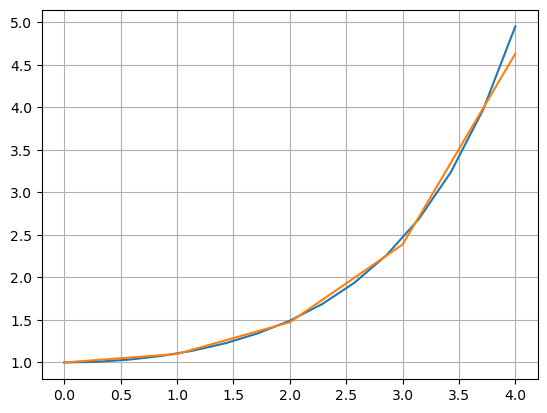

In [7]:
def funcion(x,y):
    return 0.2*x*y

def rk2(f,x0,xn,y0,h):
    y = []
    n = int((xn - x0)/h)
    x = np.linspace(x0,xn,n+1)
    y.append(y0)
    for i in range(0,n):
        yaux = y[i] + h*f(x[i],y[i])
        yi1 = y[i] + (h/2)*(f(x[i],y[i])+f(x[i+1],yaux))
        y.append(yi1)
    print(x,y)
    return (x,y)
            
(x,y) = rk2(funcion,0,4,1,1)

X = np.linspace(0,4,15)
Y = np.exp(0.1*(X**2))
plt.grid()
plt.plot(X,Y)
plt.plot(x,y)

## Método de Runge Kutta de orden 4 (RK4)


Para el problema 
$$ y'=f(x,y) \quad ; \quad y(x_0)=y_0 $$

el algoritmo asociado al método RK4 está dado por:
    
Para $i=0,1, ... , n-1$ realizar <br>

*    $ x_i = x_0+ih $ <br>

*    $ K_1 = f(x_i,y_i) $ <br>

*    $ K_2 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_1 \right) $ <br>

*    $ K_3 = f\left( x_i + \dfrac{h}{2} , y_i + \dfrac{h}{2} K_2 \right) $ <br>

*    $ K_4 = f\left( x_i + h , y_i + h K_3 \right) $ <br>

*    $y_{i+1} = y_i + \dfrac{h}{6} \left[ K_1 + 2K_2 + 2K_3 + K_4 \right] $ <br>

Fin

## Ejercicio:

* a)  Elabore una función en Python que permita encontrar una aproximación de $y(x_n)$ utilizando el método de RK4 para el problema de valores iniciales general

$$ y'(x)=f(x,y) \quad , \quad y(x_0)=y_0$$

dados los datos de entrada $f(x,y), x_0, x_n, y_0, n$ (o $h$ en su defecto)

* b) Utilice el método de Euler mejorado para el problema de valores iniciales:

$$ y' = 0,2xy \quad ; \quad y(0) = 1$$

en el intervalo $[0, 4]$ usando h = 1, para aproximar $y(4)$.

* c) La solución explícita al PVI está dada por $y=e^{0,1x^2}$ (verifíquelo en otra ocasión). En un mismo gráfico grafique la solución real, junto con las aproximaciones encontradas con este método. A partir de los resultados del gráfico, determine si la aproximación encontrada es una buena aproximación. 

* d) Calcule el error cometido y compruebe si la respuesta dada en el item anterior es aceptable.

[0. 1. 2. 3. 4.] [1, 1.1051666666666666, 1.4917539666666666, 2.458907788388889, 4.947240506645498]


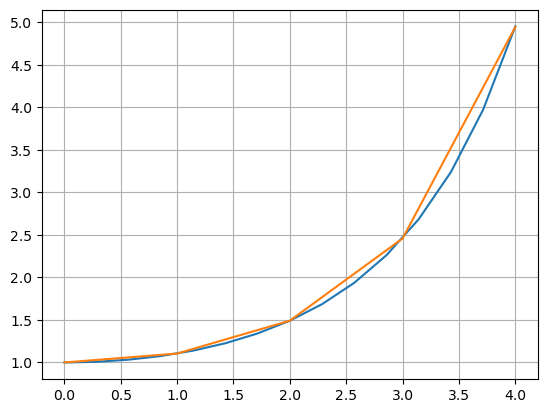

In [8]:
def funcion(x,y):
    return 0.2*x*y

def rk4(f,x0,xn,y0,h):
    y = []
    n = int((xn - x0)/h)
    x = np.linspace(x0,xn,n+1)
    y.append(y0)
    for i in range(0,n):
        k1 = f(x[i],y[i])
        k2 = f(x[i]+h/2, y[i]+(h/2)*k1)
        k3 = f(x[i]+h/2, y[i]+(h/2)*k2)
        k4 = f(x[i]+h, y[i]+h*k3)
        yi1 = y[i] + (h/6)*(k1+2*k2+2*k3+k4)
        y.append(yi1)
    print(x,y)
    return (x,y)
            
(x,y) = rk4(funcion,0,4,1,1)

X = np.linspace(0,4,15)
Y = np.exp(0.1*(X**2))
plt.grid()
plt.plot(X,Y)
plt.plot(x,y)

## Ejercicios adicionales

a) Utilice los métodos de Euler,  Euler mejorado y Runge Kutta para aproximar $y(0,5)$, donde $y(x)$ es la solución del PVI

$$ y' = x\sin y  \quad ; \quad y(0) = 1.$$

Para ello utilice:
    * $h = 0,25$ 
    * $h= 0,1 $
    
b) Encuentre la solución explícita al PVI.

c) Grafique en un mismo plano, la solución explícita y cada una de las aproximaciones encontradas. Establezca a partir de éste, cuál de las tres aproximaciones es mejor.

d) Identifique, a partir del gráfico, cuál de los tres métodos tiene un error global más grande.

e) Calcule el error absoluto en cada método y concluya en base a estos resultados cuál es la mejor aproximación.

f) Repita el proceso (a)-(e) con los PVI

   * $ y' = 1+(x-y)^2 \quad ; \quad y(2)=1 $
   * $ y' - \dfrac{y}{x} = 1 \quad ; \quad y(1)=2 $